In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/raw/loan_data.csv")

# Show basic info
print(df.info())  # Column types & missing values
print(df.head())  # First few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [2]:
print(df.isnull().sum())  # Count missing values per column


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [3]:
print(f"Number of duplicates: {df.duplicated().sum()}")  # Count duplicates

# Remove duplicate rows if necessary
df = df.drop_duplicates()


Number of duplicates: 0


In [4]:
print(df.describe())  # Summary statistics for numerical features


                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000  

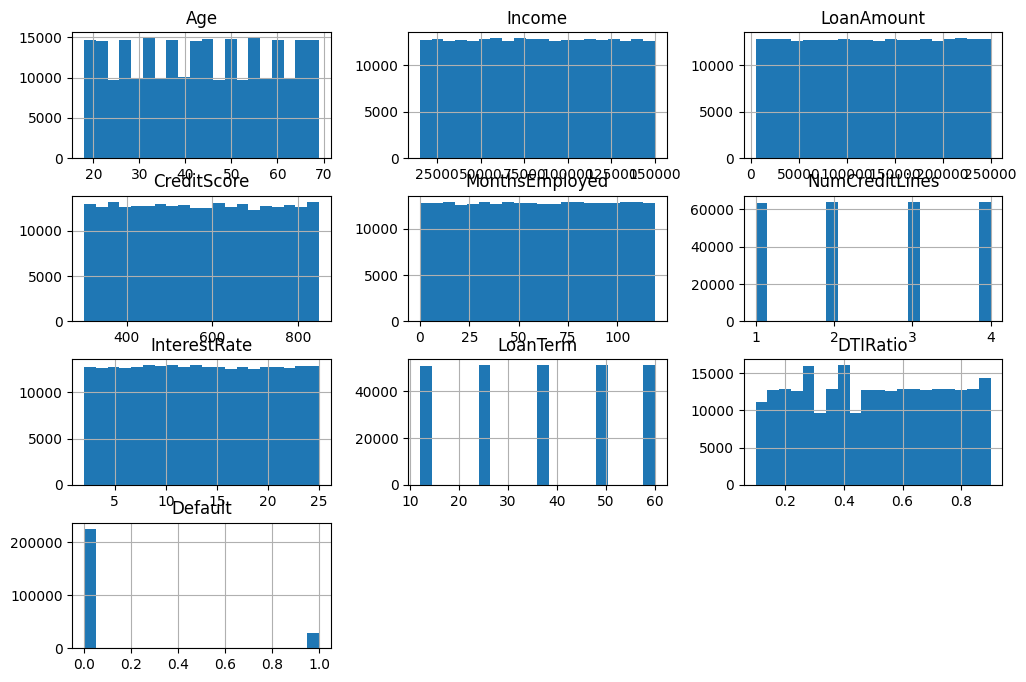

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


df.hist(figsize=(12, 8), bins=20)
plt.show()


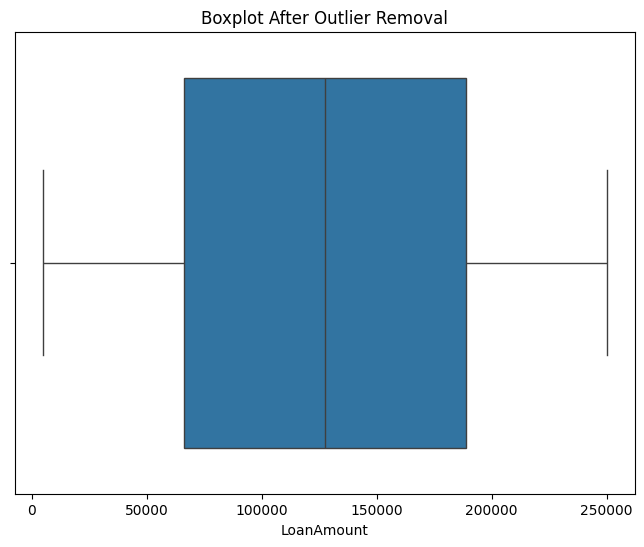

In [6]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['LoanAmount'])
plt.title("Boxplot After Outlier Removal")
plt.show()


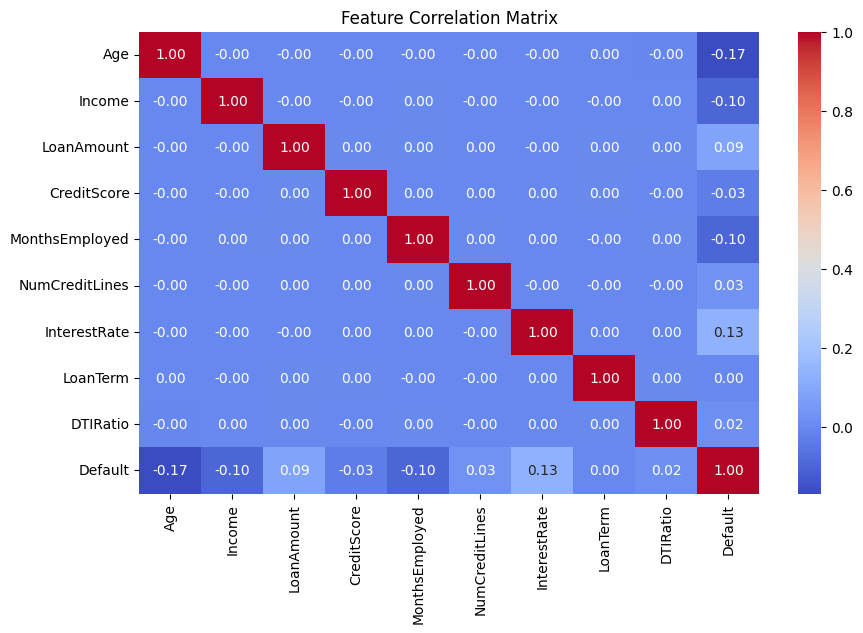

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (excluding LoanID)
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [8]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col != "LoanID"]

print(df[cat_features].nunique())  # Count unique values in each categorical column



Education         4
EmploymentType    4
MaritalStatus     3
HasMortgage       2
HasDependents     2
LoanPurpose       5
HasCoSigner       2
dtype: int64



Default Ratios for Education:

             No Default (%)  Default (%)
Education                               
Bachelor's        87.898891    12.101109
High School       87.121105    12.878895
Master's          89.128279    10.871721
PhD               89.414042    10.585958

Default Ratios for EmploymentType:

                No Default (%)  Default (%)
EmploymentType                             
Full-time            90.536634     9.463366
Part-time            88.034787    11.965213
Self-employed        88.537971    11.462029
Unemployed           86.447105    13.552895

Default Ratios for MaritalStatus:

               No Default (%)  Default (%)
MaritalStatus                             
Divorced            87.467219    12.532781
Married             89.602823    10.397177
Single              88.087564    11.912436

Default Ratios for HasMortgage:

             No Default (%)  Default (%)
HasMortgage                             
No                87.654892    12.345108
Yes          

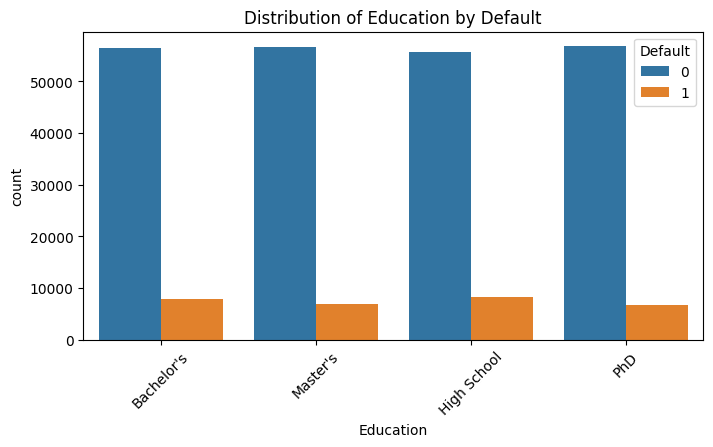

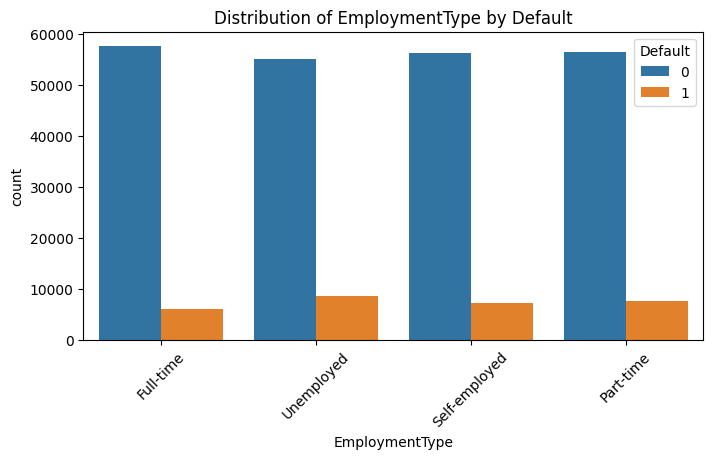

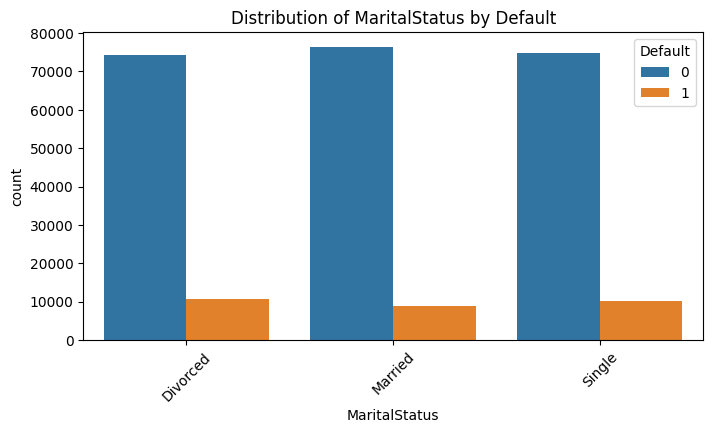

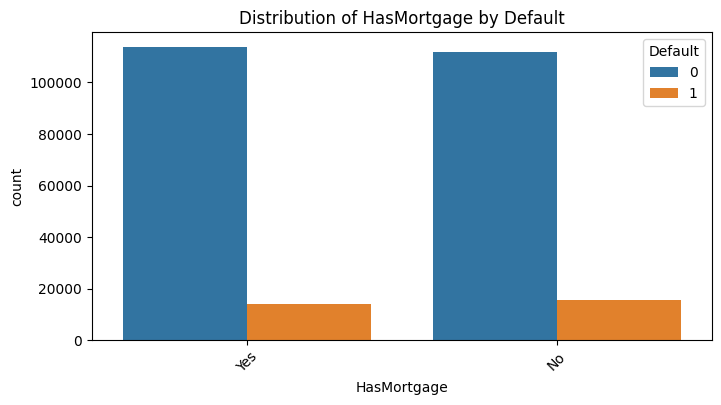

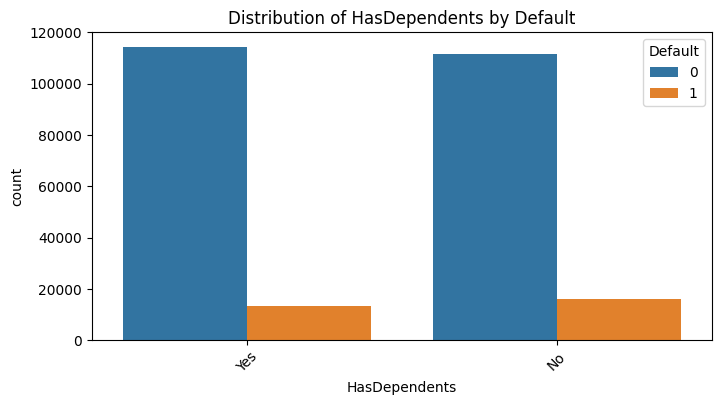

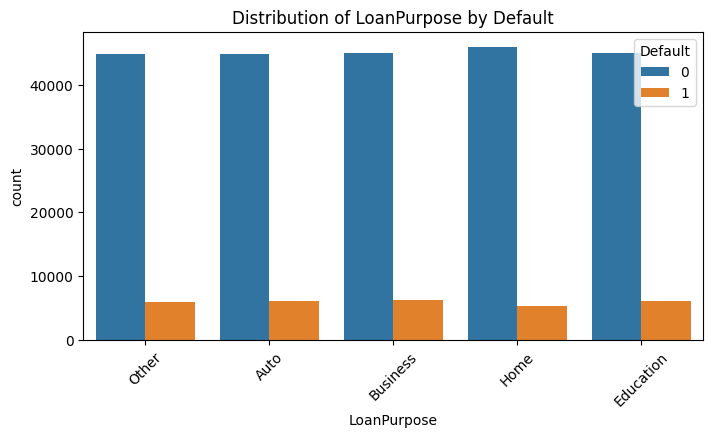

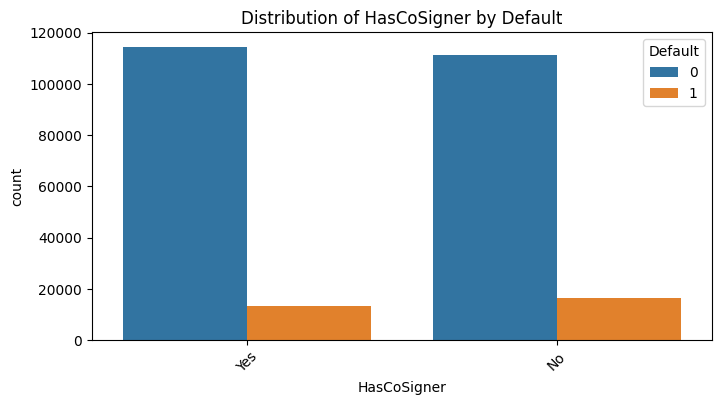

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in cat_features:
    print(f"\nDefault Ratios for {col}:\n")
    
    # Calculate the percentage of Default = 1 and Default = 0 within each category
    default_ratios = df.groupby(col)['Default'].value_counts(normalize=True).unstack() * 100  
    
    # Rename columns for clarity
    default_ratios.columns = ["No Default (%)", "Default (%)"]
    
    print(default_ratios)


for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], hue=df['Default'])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col} by Default")
    plt.show()


In [10]:
import pandas as pd

# Drop LoanID (since it's just an identifier)
df = df.drop(columns=['LoanID'])
# Show basic info
print(df.head())  # First few rows


   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21.17        24      0.31     Master's     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73   Bachelor's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
education_order = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df["Education"] = df["Education"].map(education_order)
max_categories = 5  # Keep the top 5 most frequent categories

for col in cat_features:
    if col != "Education":  # Skip "Education" since we label encoded it
        top_categories = df[col].value_counts().index[:max_categories]
        df[col] = df[col].apply(lambda x: x if x in top_categories else "Other")

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=[col for col in cat_features if col != "Education"], drop_first=True)
# Show basic info
print(df.head())  # First few rows

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  ...  \
0         15.23        36      0.44          1  ...   
1          4.81        60      0.68          2  ...   
2         21.17        24      0.31          2  ...   
3          7.07        24      0.23          0  ...   
4          6.51        48      0.73          1  ...   

   EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                      False                  False                 False   
1                      False                   True             

In [13]:
# Define target variable
target_column = "Default"  # Change if necessary

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])  
y = df[target_column]


In [14]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
print("Class distribution in y (original):")
print(y.value_counts(normalize=True))

print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("Class distribution in y_test:")
print(y_test.value_counts(normalize=True))



Training set: (204277, 22), Testing set: (51070, 22)
Class distribution in y (original):
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64
Class distribution in y_train:
Default
0    0.883873
1    0.116127
Name: proportion, dtype: float64
Class distribution in y_test:
Default
0    0.883865
1    0.116135
Name: proportion, dtype: float64


In [15]:
import os

# Create directories
os.makedirs("../data/train", exist_ok=True)
os.makedirs("../data/test", exist_ok=True)

# Save train & test data
X_train.to_csv("../data/train/X_train.csv", index=False)
X_test.to_csv("../data/test/X_test.csv", index=False)
y_train.to_csv("../data/train/y_train.csv", index=False)
y_test.to_csv("../data/test/y_test.csv", index=False)
